In [1]:
#Nguyen Vinh Nghi_CE182108_CPV301_Lab2
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import numpy as np
import math

/home/winter24/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# img_pth = r"./Lady_grayscale_salt_pepper.png"
img_pth = r"./Unequalized_pic.jpg"
img = cv2.imread(img_pth)

In [3]:
def draw_img(balanced_image, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(balanced_image)
    plt.title(title)

    plt.show()

In [4]:
def adjust_color_balance(red_factor, green_factor, blue_factor):
    image = img.copy()
    b, g, r = cv2.split(image)
    t = "Color Balanced Image"

    red_channel = cv2.multiply(r, red_factor)
    green_channel = cv2.multiply(g, green_factor)
    blue_channel = cv2.multiply(b, blue_factor)

    balanced_image = cv2.merge((blue_channel, green_channel, red_channel))
    draw_img(balanced_image,t)


In [5]:
def histogram_equalization(image):
    t = "Histogram Equalization"
    if len(image.shape) == 2:  # Grayscale image
        equalized_img = cv2.equalizeHist(image)
    else:
        b, g, r = cv2.split(image)
        
        # Apply histogram 
        b_eq = cv2.equalizeHist(b)
        g_eq = cv2.equalizeHist(g)
        r_eq = cv2.equalizeHist(r)
        equalized_img = cv2.merge((b_eq, g_eq, r_eq))

    draw_img(equalized_img, t)

In [6]:
def median_filter(img, kernel):
    t = "Median Filter"
    # Distance from the center to the edge of the kernel 
    pad_size = kernel // 2
    padded_image = cv2.copyMakeBorder(img, pad_size, 
                pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)

    h, w, c = img.shape  
    
    filtered_image = np.zeros_like(img)

    for i in range(h):
        for j in range(w):
            roi = padded_image[i:i+kernel, j:j+kernel]
            filtered_image[i, j] = np.median(roi)
    
    draw_img(filtered_image, t)

In [7]:
def mean_filter(img, kernel):
    t = "Mean Filter"
    
    pad_size = kernel // 2
    padded_image = cv2.copyMakeBorder(img, pad_size, 
                pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)

    h, w, _ = img.shape  
    filtered_image = np.zeros_like(img)

    for i in range(h):
        for j in range(w):
            neighborhood = padded_image[i:i+kernel, j:j+kernel]
            mean_value = np.mean(neighborhood)
            filtered_image[i, j] = mean_value
    
    draw_img(filtered_image, t)

In [8]:
def gaussian_kernel(size, std):
    """Function to create a Gaussian kernel given a size and standard deviation."""
    kernel = np.zeros((size, size))
    mean = size // 2
    sum_val = 0
    
    # Create the Gaussian kernel
    for x in range(size):
        for y in range(size):
            kernel[x, y] = math.exp(-((x - mean) ** 2 +
                         (y - mean) ** 2) / (2 * std ** 2))
            sum_val += kernel[x, y]
    
    # Normalize the kernel
    kernel /= sum_val
    return kernel

In [9]:
def gaussian_smoothing(img, kernel ,gk):
    t = "Gaussian Smoothing"
    pad_size =  kernel// 2
    
    padded_image = np.pad(img, pad_size, 
                mode='constant', constant_values=0)
    
    h, w, c = img.shape
    smoothed_image = np.zeros_like(img)
    
    # Loop over each pixel in the image
    for channel in range(c):
        for i in range(h):
            for j in range(w):
                neighborhood = padded_image[i:i+kernel, j:j+kernel, channel]
                # Apply Gaussian kernel 
                smoothed_value = np.sum(neighborhood * gk)
                smoothed_image[i, j] = smoothed_value
    
    draw_img(smoothed_image, t)


Please choose one of the following image processing methods:
1. Color Balance
2. Histogram Equalization
3. Median Filter
4. Mean Filter
5. Gaussian Smoothing
          


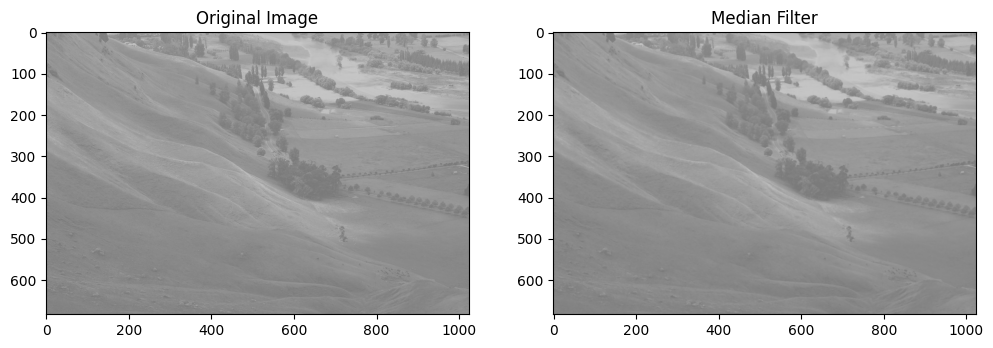

In [10]:
print("""
Please choose one of the following image processing methods:
1. Color Balance
2. Histogram Equalization
3. Median Filter
4. Mean Filter
5. Gaussian Smoothing
          """)
choice = int(input("Type your choice here: "))
if choice == 1:
    interact(adjust_color_balance,
         red_factor=FloatSlider(value=1.0, min=0, max=2, step=0.01, description='Red Balance'),
         green_factor=FloatSlider(value=1.0, min=0, max=2, step=0.01, description='Green Balance'),
         blue_factor=FloatSlider(value=1.0, min=0, max=2, step=0.01, description='Blue Balance'))
elif choice == 2:
    histogram_equalization(img)
elif choice == 3:
    kernel_size = int(input("Kernel size: "))
    result = median_filter(img, kernel_size)
elif choice == 4:
    kernel_size = int(input("Kernel size: "))
    mean_filter(img, kernel_size)
elif choice == 5:
    kernel_size = int(input("Kernel size: "))
    std = int(input("Standard deviation: "))
    gk = gaussian_kernel(kernel_size, std)
    gaussian_smoothing(img, kernel_size, gk)
else:
    raise ValueError("Invalid choice.")
